In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('..\Datasets\datacamp_dataset\Pandas\sales_subset.csv')
sales.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


지금까지 배운 요약통계를 활용하여 각각의 그룹마다 얼마나 비중을 차지하는지를 알 수 있다.

In [3]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum() # agg(sum)과 결과는 동일

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


위의 코드는 똑같은 과정을 세 번 반복한다.  
이를 groupby를 활용하면 더 쉽게 사용이 가능하다.  

In [4]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales["weekly_sales"])
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [5]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [6]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([min, max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([min, max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


In [7]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales",
                                           index="type",
                                           aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [8]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [9]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values="weekly_sales",
index="type",
columns="department",
fill_value=0))

# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales",
                        index="department",
                        columns="type",
                        fill_value=0, 
                        margins=True))

department            1              2             3             4   \
type                                                                  
A           30961.725379   67600.158788  17160.002955  44285.399091   
B           44050.626667  112958.526667  30580.655000  51219.654167   

department            5             6             7             8   \
type                                                                 
A           34821.011364   7136.292652  38454.336818  48583.475303   
B           63236.875000  10717.297500  52909.653333  90733.753333   

department            9             10  ...            90            91  \
type                                    ...                               
A           30120.449924  30930.456364  ...  85776.905909  70423.165227   
B           66679.301667  48595.126667  ...  14780.210000  13199.602500   

department             92            93            94             95  \
type                                                         

In [10]:
temperatures = pd.read_csv("../Datasets/datacamp_dataset/Pandas/temperatures.csv")
temperatures.head()

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [11]:
# Look at temperatures
print(temperatures.head())

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
...             ...         ...            ...         ...
Xian          16495  2013-05-01          China      18.979
Xian          16496  2013-06-01          China      23.522
Xian          16497  2013-07-01       

In [12]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

In [13]:
rows_to_keep = ["country", "city"]

temperatures.set_index(rows_to_keep)
# temperatures_ind.set_index(rows_to_keep)

Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan           2  2000-03-01      29.061
              Abidjan           3  2000-04-01      28.162
              Abidjan           4  2000-05-01      27.547
...                           ...         ...         ...
China         Xian          16495  2013-05-01      18.979
              Xian          16496  2013-06-01      23.522
              Xian          16497  2013-07-01      25.251
              Xian          16498  2013-08-01      24.528
              Xian          16499  2013-09-01         NaN

[16500 rows x 3 columns]

In [14]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
# 이 망할놈의 오타 ㅠㅠ
# rows_to_keep = [("Brazil","Rio De janeiro"), ("Pakistan", "Lahore")]
rows_to_keep = [("Brazil","Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


In [15]:
temperatures_ind = temperatures.set_index(["country", "city"]).index.unique()


In [16]:
for country, city in temperatures_ind:
    if country == "Brazil":
        print(country, city)

Brazil Belo Horizonte
Brazil Brasília
Brazil Fortaleza
Brazil Rio De Janeiro
Brazil São Paulo
Brazil Salvador


In [17]:
temperatures['date'] = temperatures.date.astype('datetime64[ns]')

# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

print(temperatures.head())

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c",
index=["country", "city"],
columns="year",
aggfunc= np.mean)

# See the result
print(temp_by_country_city_vs_year)

   Unnamed: 0       date     city        country  avg_temp_c  year
0           0 2000-01-01  Abidjan  Côte D'Ivoire      27.293  2000
1           1 2000-02-01  Abidjan  Côte D'Ivoire      27.685  2000
2           2 2000-03-01  Abidjan  Côte D'Ivoire      29.061  2000
3           3 2000-04-01  Abidjan  Côte D'Ivoire      28.162  2000
4           4 2000-05-01  Abidjan  Côte D'Ivoire      27.547  2000
year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...

In [18]:
temperatures.head()

,Unnamed: 0,date,city,country,avg_temp_c,year
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293,2000
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685,2000
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061,2000
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162,2000
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547,2000


In [19]:
# Subset for Egypt to India
# print(temp_by_country_city_vs_year.head())
print(temp_by_country_city_vs_year.loc["Egypt":"India"])

# Subset for Egypt, Cairo to India, Delhi
print(temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi")])

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
print(temp_by_country_city_vs_year.loc[("Egypt", "Cairo") :("India", "Delhi"), 2005:2010])

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Alexandria   20.744500  21.454583  21.456167  21.221417  21.064167   
         Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.63433

In [20]:
avocados = pd.read_csv("../Datasets/datacamp_dataset/Pandas/avocado.csv")

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


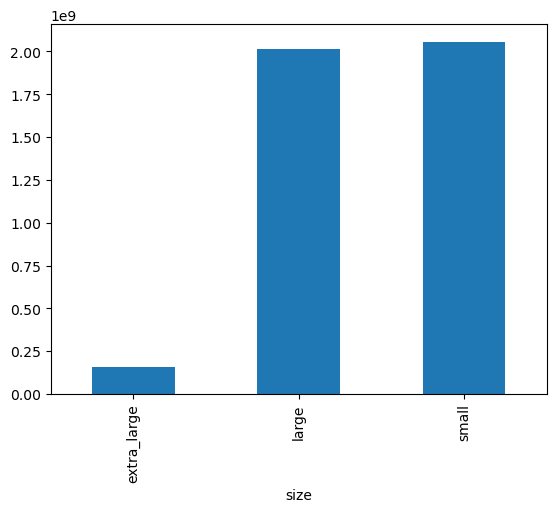

In [21]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


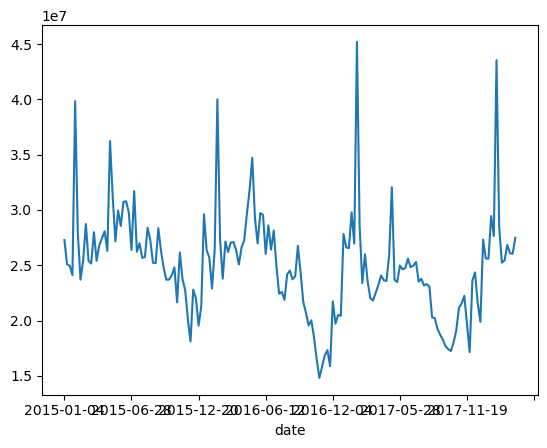

In [22]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

print(avocados.head())
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line", x="date",)

# Show the plot
plt.show()

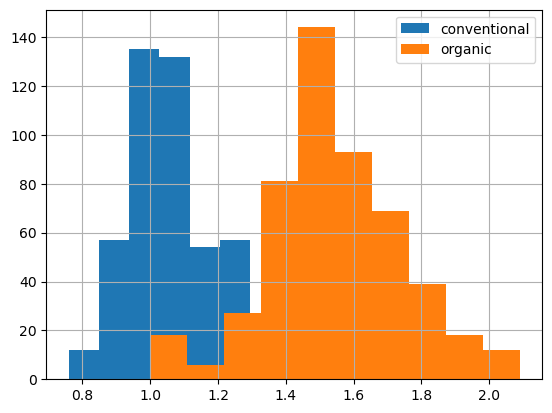

In [23]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

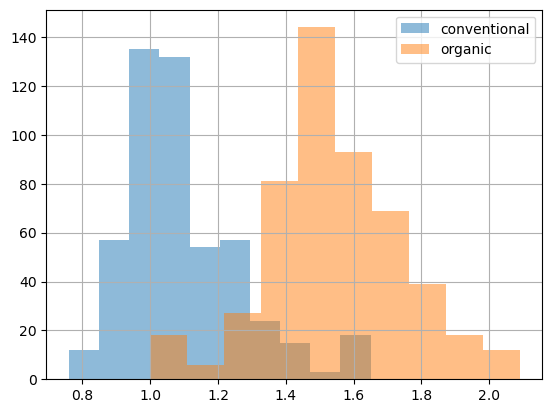

In [24]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

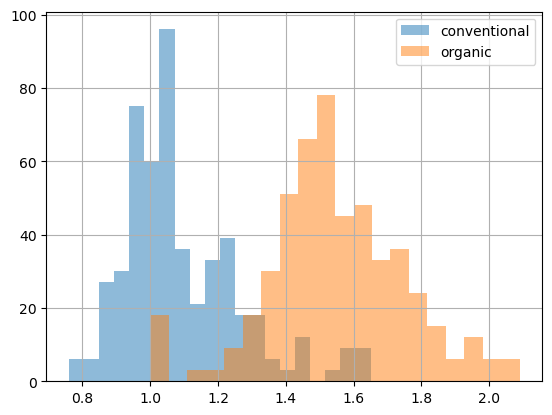

In [25]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


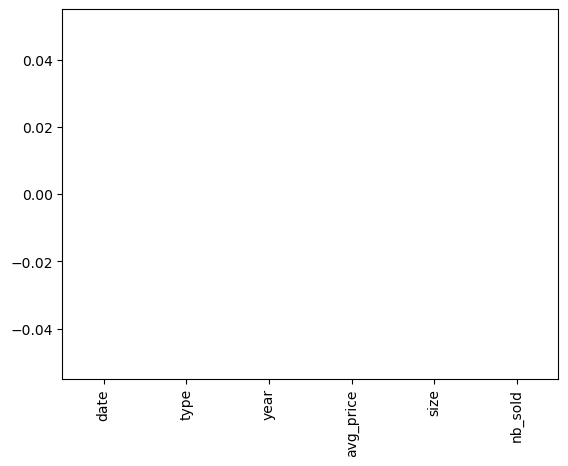

In [26]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados.isna())

# Check each column for missing values
print(avocados.isna().any())

# Bar plot of missing values by variable
avocados.isna().sum().plot(kind="bar")

# Show plot
plt.show()